> Workshop LabCity
# Processamento de Imagens com Python e OpenCV
## Parte 2: Operações Básicas

Nesta aula iremos aprender as principais operações básicas utilizadas em pipelines de processamento de imagens.

1. Conversão de espaços de cor (Escala de Cinza, RGB, HSV)
2. Extração de regiões de interesse (ROI)
3. Desenho de formas geométricas e textos na imagem
4. Operações lógicas entre imagens

Utilizaremos a imagem `workshop-opencv/notebooks/images/gatogordo.jpg` para demonstração.

---
## Importando as bibliotecas necessárias

In [375]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [376]:
example_image = "media/gatogordo.jpg"  # Define o caminho da imagem de exemplo

# Carregar a imagem em seu formato original
imagem = cv2.imread(example_image)

---
## Conversão de Espaços de Cores

Os espaços de cores são maneiras de representar cores, cada um com diferentes finalidades. Os principais espaços de cores usados no processamento de imagens incluem

- RGB ( Red, Green, Blue )
- Escala de Cinza
- HSV ( Hue, Saturation, Value)

No OpenCV, a função `cv2.cvtColor()` é utilizada para conversão entre os espaços.

In [377]:
# Exibir o formato do tensor da imagem
imagem.shape

(1250, 1250, 3)

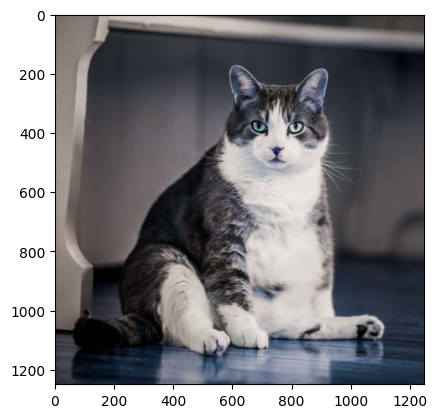

In [378]:
# Exibir a imagem
plt.imshow(imagem)

### RGB (Red, Green, Blue) 

Flag: `cv2.COLOR_BGR2RGB`

É o espaço de cores mais comum, onde cada cor é definida por uma combinação de três valores, um para cada componente: vermelho, verde e azul. A maioria das imagens digitais é representada em RGB.

In [379]:
# Converte a imagem de BGR para RGB
rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

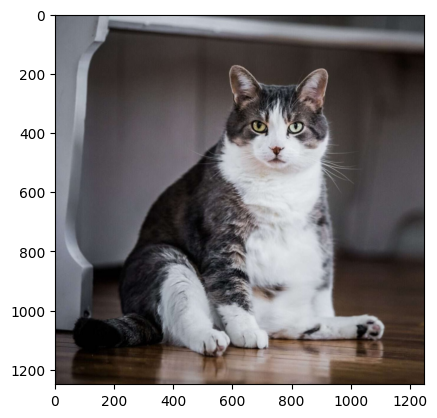

In [380]:
# Mostrar a imagem
plt.imshow(rgb)

### Grayscale (Escala de Cinza)
É um espaço de cores com apenas uma dimensão, representando variações de intensidade de luz, indo do preto (valor 0) ao branco (valor 255). Não contém informações de cor, apenas a intensidade luminosa.

In [381]:
# Transformar a imagem em escala de cinza
grayscale = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [382]:
# Exibir o formato da imagem
grayscale.shape

(1250, 1250)

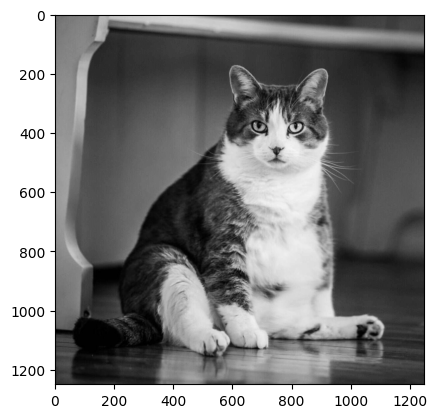

In [383]:
# Exibir a imagem
plt.imshow(grayscale, cmap="gray")

### HSV (Hue, Saturation, Value) 
Esse espaço de cores representa as cores de uma forma mais intuitiva:
•	Hue (Matiz): Representa a cor (0 a 360° no círculo cromático).
•	Saturation (Saturação): Define a “pureza” ou intensidade da cor (0 a 100%).
•	Value (Valor): Representa o brilho da cor (0 a 100%).

In [384]:
# Transformar a imagem em HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

In [385]:
# Exibir o formato do tensor da imagem
hsv.shape

(1250, 1250, 3)

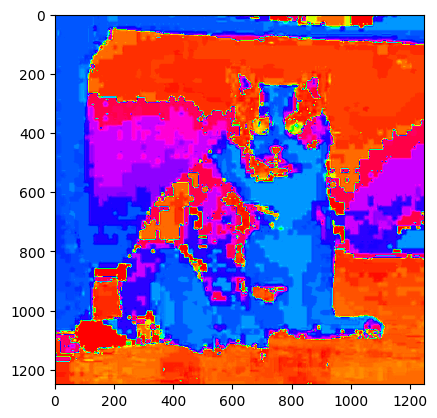

In [386]:
# Exibir valores de Matiz
plt.imshow(hsv[:, :, 0], cmap="hsv")

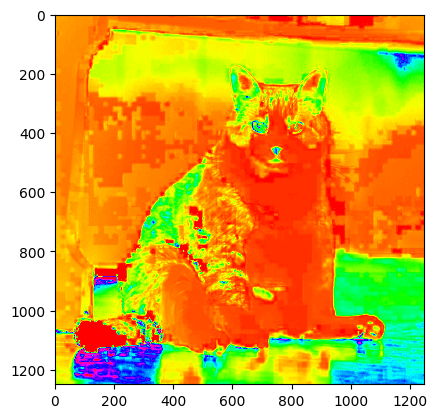

In [387]:
# Exibir valores de Saturação
plt.imshow(hsv[:, :, 1], cmap="hsv")

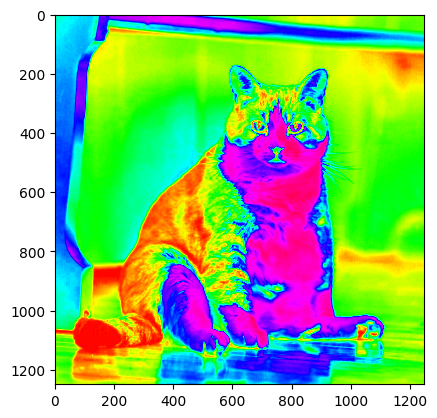

In [388]:
# Exibir valores de Brilho
plt.imshow(hsv[:, :, 2], cmap="hsv")

---
## Extração de Regiões de Interesse (ROI)

Em muitos projetos será necessário tratar partes específicas de uma imagem, denominadas Regiões de Interesse (ROI). Para extrair uma ROI é possível usar a ferramenta de slicing do NumPy.

Em uma imagem colorida (RGB), geralmente representada por um array com a forma (altura, largura, canais), o slicing permite selecionar uma parte da imagem, definindo intervalos para as dimensões de altura e largura.

A operação de slicing é feita com a seguinte sintaxe: `imagem[a1:b1, a2:b2, c1:c2]`. O operador `:` permite a seleção de todos os elementos entre `a` e `b`.

In [389]:
# Slice da imagem inteira
roi = rgb[:, :, :]

In [390]:
roi.shape

(1250, 1250, 3)

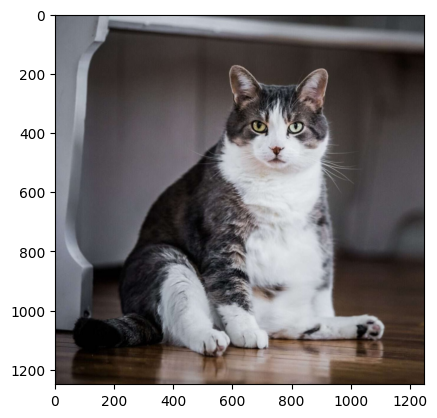

In [391]:
plt.imshow(roi)

In [392]:
# Extração do lado esquerdo da imagem
roi = rgb[:, :600, :]

In [393]:
roi.shape

(1250, 600, 3)

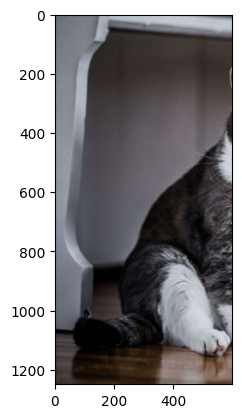

In [394]:
plt.imshow(roi)

In [395]:
# Extração da face do gato
roi = rgb[150:550, 500:950, :]

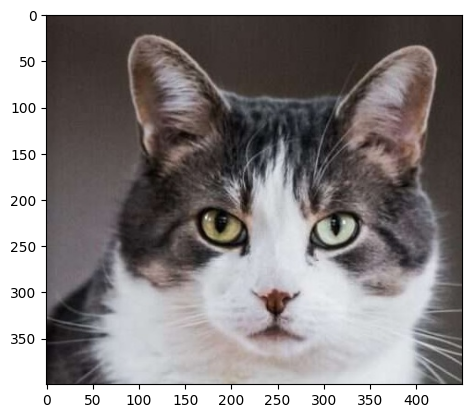

In [396]:
plt.imshow(roi)

---
## Desenhando Formas Geométricas na Imagem

Nesta seção vamos explorar as funções do OpenCV que permitem a inserção de formas geométricas na imagem.

Essas funções de desenho são amplamente utilizadas em aplicações práticas:

- Visualização: Desenhar contornos, destacar objetos e adicionar feedback visual em algoritmos de detecção (como detecção de rostos, contagem de objetos, ou rastreamento de movimento).
- Anotação e Rotulagem: Facilitar a anotação manual de dados para treinamento de modelos de machine learning.
- Depuração: Durante o desenvolvimento, ajudam a verificar se os algoritmos de processamento de imagem estão funcionando corretamente, mostrando áreas de interesse ou resultados diretamente sobre a imagem.

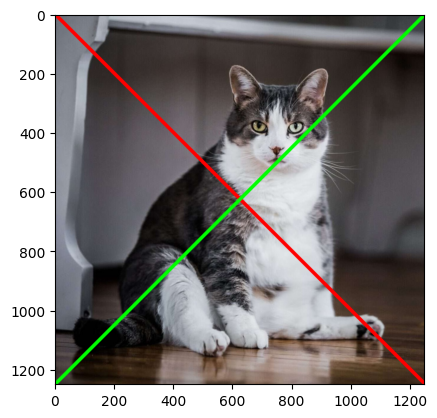

In [397]:
# Desenhando Linhas
imagem_com_linhas = rgb.copy()
cv2.line(imagem_com_linhas, (0, 0), (1250, 1250), (255, 0, 0), 10)
cv2.line(imagem_com_linhas, (0, 1250), (1250, 0), (0, 255, 0), 10)
plt.imshow(imagem_com_linhas)

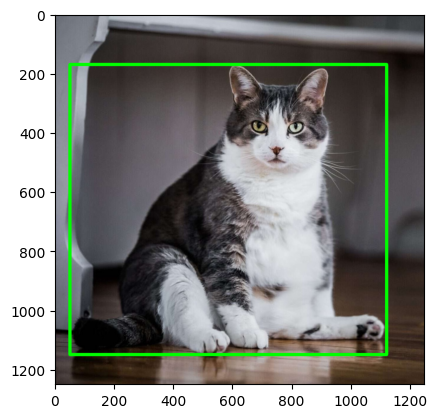

In [398]:
# Desenhando Retângulos
imagem_com_retangulos = rgb.copy()
cv2.rectangle(imagem_com_retangulos, (50, 170), (1120, 1150), (0, 255, 0), 10)
plt.imshow(imagem_com_retangulos)

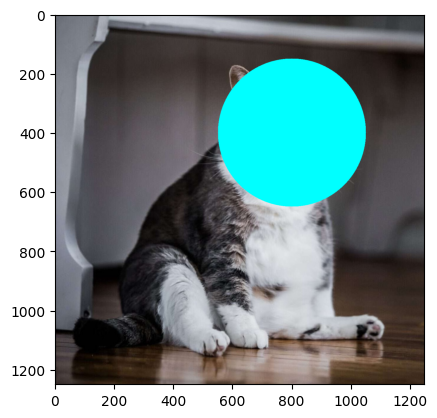

In [399]:
# Desenhando Círculos
imagem_com_circulos = rgb.copy()
cv2.circle(imagem_com_circulos, (800, 400), 250, (0, 255, 255), -1)
plt.imshow(imagem_com_circulos)

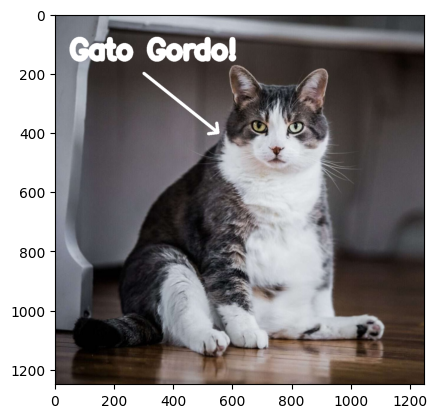

In [400]:
# Inserindo textos na imagem
imagem_com_texto = rgb.copy()
texto = "Gato Gordo!"
cv2.putText(
    img=imagem_com_texto,
    text=texto,
    org=(50, 150),
    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
    fontScale=3,
    color=(255, 255, 255),
    thickness=20,
)

# Também é possível desenhar setas na imagem
cv2.arrowedLine(
    img=imagem_com_texto,
    pt1=(300, 200),
    pt2=(550, 400),
    color=(255, 255, 255),
    thickness=10,
)

plt.imshow(imagem_com_texto)

> Uma aplicação útil é a inserção de Timestamps na imagem

In [422]:
# Importar a biblioteca datetime
import datetime

# Fazer uma cópia da imagem
imagem_com_timestamp = rgb.copy()

# Armazenar data e hora atual em uma variável
texto = datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")
texto

'06/09/2024 20:33:14'

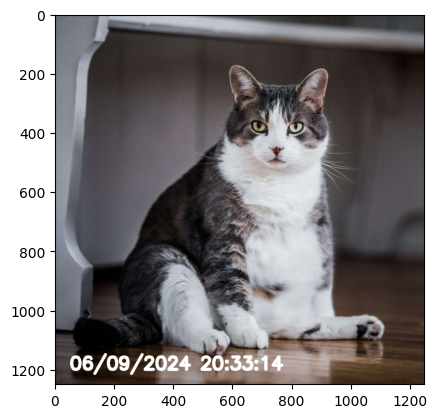

In [423]:
# Inserir o texto na imagem
cv2.putText(
    img=imagem_com_timestamp,
    text=texto,
    org=(50, 1200),
    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
    fontScale=2,
    color=(255, 255, 255),
    thickness=10,
)

plt.imshow(imagem_com_timestamp)

---
## Operações Lógicas

As operações lógicas bitwise no OpenCV permitem manipular os pixels de uma imagem de maneira binária, usando operações como AND, OR, XOR, e NOT. Essas operações são fundamentais para combinar, mascarar ou destacar regiões específicas de imagens. Elas são comumente usadas em tarefas de segmentação, extração de regiões de interesse e combinação de imagens.

![logic](media/logic.png)

Para demonstrar as operações lógicas, vamos criar duas máscaras binárias, uma contendo um círculo e outra um quadrado

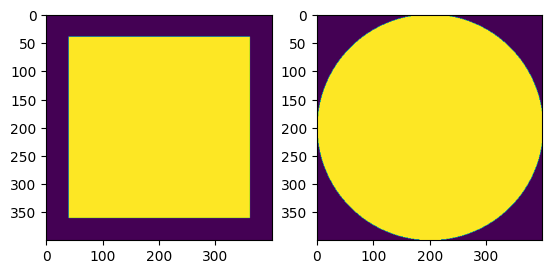

In [403]:
# Criar imagens de exemplo usando NumPy
# Dimensões da imagem (400x400)
quadrado = np.zeros((400, 400), dtype=np.uint8)
circulo = np.zeros((400, 400), dtype=np.uint8)

# Desenhar um retângulo branco na primeira imagem
cv2.rectangle(quadrado, (40, 40), (360, 360), 255, -1)  # Branco é 255

# Desenhar um círculo branco na segunda imagem
cv2.circle(circulo, (200, 200), 200, 255, -1)

# Mostrar as imagens em subplots
plt.subplot(121)
plt.imshow(quadrado)
plt.subplot(122)
plt.imshow(circulo)

### Operação NOT

- Realiza uma operação NOT bit a bit, invertendo todos os bits de uma imagem. Os pixels pretos (0) tornam-se brancos (255), e os brancos tornam-se pretos.
- Aplicação: Usada para inverter imagens ou criar máscaras complementares.

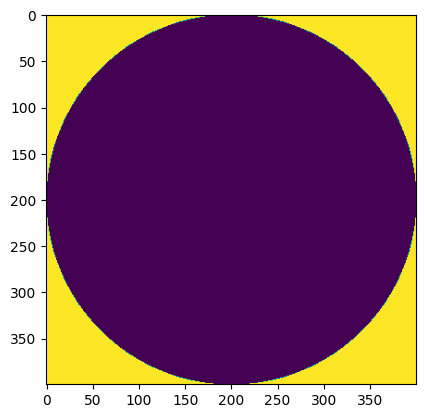

In [404]:
# Operação Bitwise NOT
result = cv2.bitwise_not(circulo)
plt.imshow(result)

### Operação AND

- Realiza uma operação AND bit a bit entre duas imagens. O pixel resultante será branco (255) apenas se os dois pixels correspondentes forem brancos nas duas imagens.
- Aplicação: Usada para segmentar ou extrair uma região específica de uma imagem usando uma máscara.

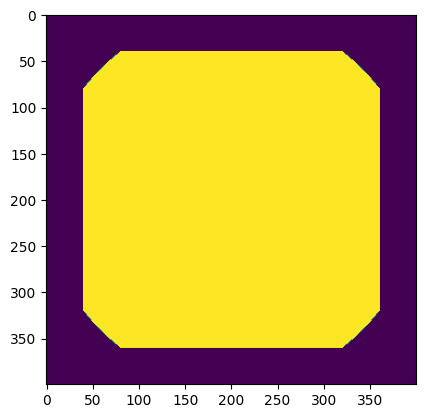

In [405]:
# Operação Bitwise AND
result = cv2.bitwise_and(quadrado, circulo)
plt.imshow(result)

### Operação OR

- Realiza uma operação OR bit a bit entre duas imagens. O pixel resultante será branco se pelo menos um dos pixels correspondentes for branco em uma das imagens.
- Aplicação: Usada para combinar duas imagens ou sobrepor regiões.

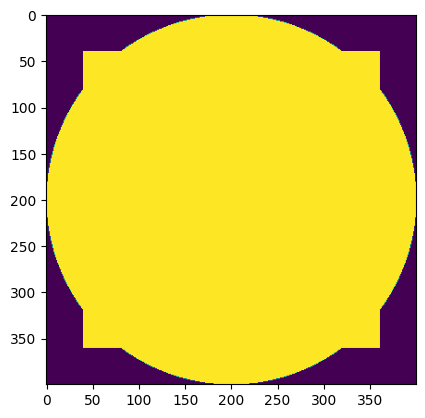

In [406]:
# Operação Bitwise OR
result = cv2.bitwise_or(quadrado, circulo)
plt.imshow(result)

### Operação Bitwise XOR

- Realiza uma operação XOR bit a bit entre duas imagens. O pixel resultante será branco se apenas um dos pixels correspondentes for branco, mas não ambos.
- Aplicação: Usada para destacar as diferenças entre duas imagens.

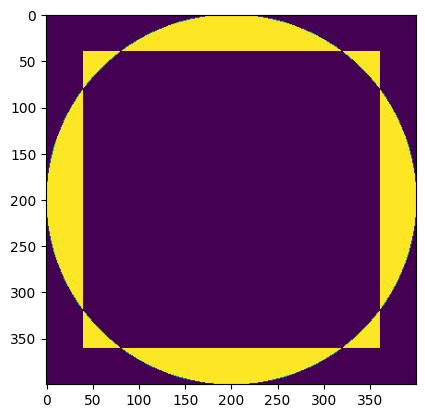

In [407]:
# Operação Bitwise XOR
result = cv2.bitwise_xor(quadrado, circulo)
plt.imshow(result)

> O que acontecerá se aplicarmos as operações na nossa imagem de exemplo?

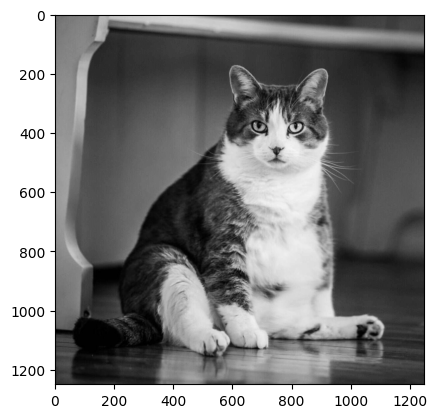

In [408]:
# Fazer uma cópia da imagem do gato RGB
exemplo = grayscale.copy()
plt.imshow(exemplo, cmap="gray")

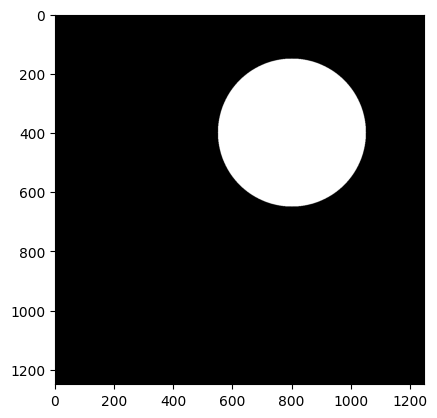

In [409]:
# Fazer um círculo do tamanho da imagem do gato
circulo = np.zeros((1250, 1250), dtype=np.uint8)
cv2.circle(circulo, (800, 400), 250, 255, -1)
plt.imshow(circulo, cmap="gray")

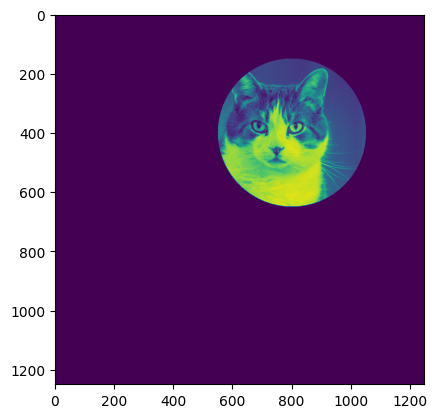

In [410]:
# Aplicar a operação Bitwise AND, dando o circulo como máscara
resultado = cv2.bitwise_and(exemplo, exemplo, mask=circulo)
plt.imshow(resultado)